# Stock Market Prediction using CNN-LSTM model
This project is about analysis of Stock Market and providing predictions to the stockholders. For this, we used CNN-LSTM approach to create a blank model, then use it to train on stock market data. Further implementation is discussed below...

# Data Preprocessing and Analysis

In [2]:
# Imports
import numpy as np
import pandas as pd
import os
import math
import seaborn as sns
import datetime as dt
from datetime import datetime    
sns.set_style("whitegrid")
from pandas.plotting import autocorrelation_plot
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use("ggplot")

Before preprocessing data, a function to fetch real-time stock data (using Alpha Vantage API) is made

In [3]:
import requests
import csv
from tqdm import tqdm

In [4]:
# For data preprocessing and analysis part
data = pd.read_csv('/content/TTM.csv')
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2005-07-13,10.62,10.64,10.51,10.60,9.197446,136500
1,2005-07-14,10.50,10.50,10.33,10.39,9.015231,136000
2,2005-07-15,10.50,10.65,10.50,10.55,9.154059,158700
3,2005-07-18,10.72,10.74,10.66,10.72,9.301566,88000
4,2005-07-19,10.80,11.03,10.80,10.99,9.535840,128000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4279 entries, 0 to 4278
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       4279 non-null   object 
 1   Open       4279 non-null   float64
 2   High       4279 non-null   float64
 3   Low        4279 non-null   float64
 4   Close      4279 non-null   float64
 5   Adj Close  4279 non-null   float64
 6   Volume     4279 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 234.1+ KB


In [6]:
data.describe()

,Open,High,Low,Close,Adj Close,Volume
count,4279.000000,4279.000000,4279.000000,4279.000000,4279.000000,4.279000e+03
mean,22.374447,22.613160,22.108888,22.368939,21.805990,1.477393e+06
std,10.299331,10.374618,10.228782,10.297576,10.523917,9.398070e+05
min,3.170000,3.410000,3.050000,3.140000,2.907577,0.000000e+00
25%,14.695000,14.900000,14.505000,14.725000,13.620653,8.599500e+05
50%,20.990000,21.230000,20.790001,21.030001,20.409922,1.268200e+06
75%,29.355001,29.719999,29.100000,29.405000,29.132829,1.866100e+06
max,51.259998,51.799999,50.650002,51.470001,51.448509,1.085910e+07


In [7]:
data.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

Filling null columns with mean values....

In [8]:
data.reset_index(drop=True, inplace=True)
data.fillna(data.mean(), inplace=True)
data.head()

<ipython-input-8-fa1560e9013b>:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data.fillna(data.mean(), inplace=True)


,Date,Open,High,Low,Close,Adj Close,Volume
0,2005-07-13,10.62,10.64,10.51,10.60,9.197446,136500
1,2005-07-14,10.50,10.50,10.33,10.39,9.015231,136000
2,2005-07-15,10.50,10.65,10.50,10.55,9.154059,158700
3,2005-07-18,10.72,10.74,10.66,10.72,9.301566,88000
4,2005-07-19,10.80,11.03,10.80,10.99,9.535840,128000


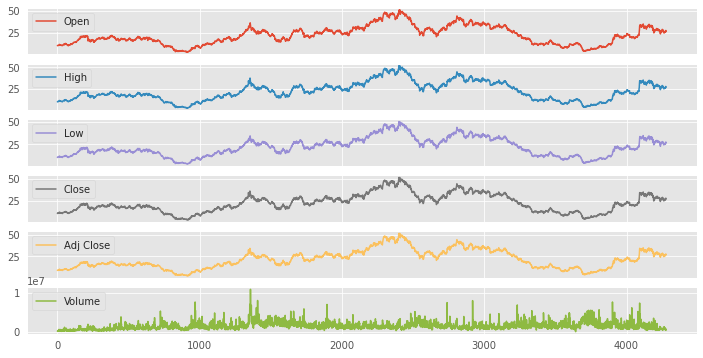

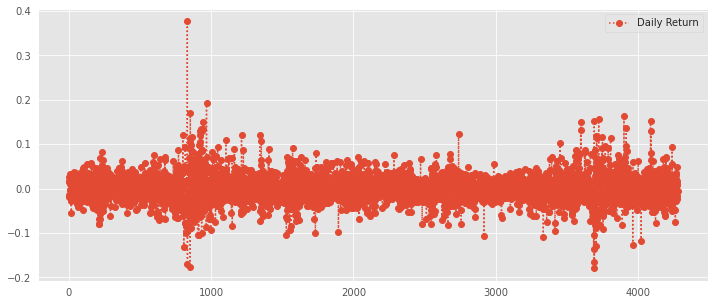

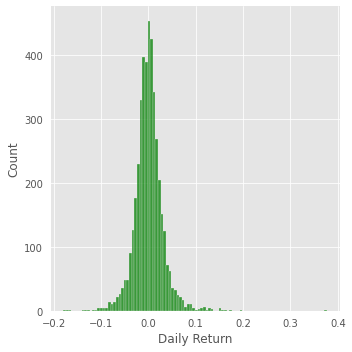

<ipython-input-9-9a77a06bb070>:34: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data.fillna(data.mean(), inplace=True)


            Date       Open       High        Low      Close  Adj Close  \
0     2005-07-13  10.620000  10.640000  10.510000  10.600000   9.197446   
1     2005-07-14  10.500000  10.500000  10.330000  10.390000   9.015231   
2     2005-07-15  10.500000  10.650000  10.500000  10.550000   9.154059   
3     2005-07-18  10.720000  10.740000  10.660000  10.720000   9.301566   
4     2005-07-19  10.800000  11.030000  10.800000  10.990000   9.535840   
...          ...        ...        ...        ...        ...        ...   
4274  2022-07-06  26.180000  26.570000  26.129999  26.420000  26.420000   
4275  2022-07-07  27.200001  27.879999  27.200001  27.700001  27.700001   
4276  2022-07-08  27.750000  28.090000  27.690001  27.900000  27.900000   
4277  2022-07-11  27.450001  27.540001  27.219999  27.260000  27.260000   
4278  2022-07-12  26.940001  27.420000  26.860001  27.129999  27.129999   

      Volume  MA for 10 days  MA for 50 days  MA for 100 days  Daily Return  
0     136500        2

Date               0
Open               0
High               0
Low                0
Close              0
Adj Close          0
Volume             0
MA for 10 days     0
MA for 50 days     0
MA for 100 days    0
Daily Return       0
dtype: int64

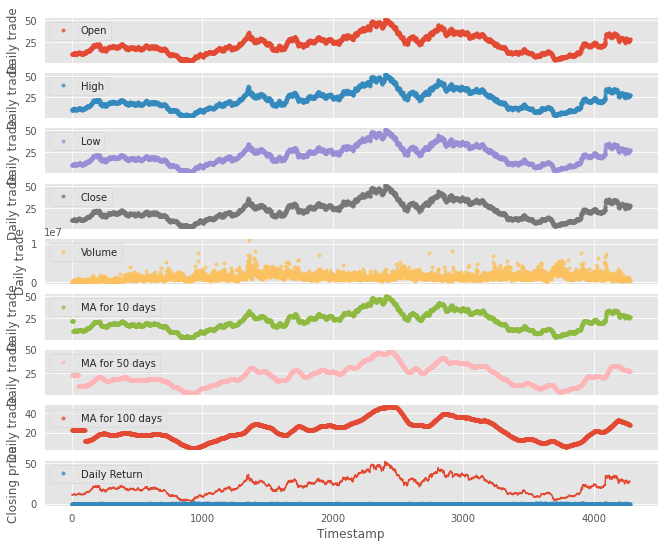

In [9]:
data.plot(legend=True,subplots=True, figsize = (12, 6))
plt.show()
#data['Close'].plot(legend=True, figsize = (12, 6))
#plt.show()
#data['Volume'].plot(legend=True,figsize=(12,7))
#plt.show()

data.shape
data.size
data.describe(include='all').T
data.dtypes
data.nunique()
ma_day = [10,50,100]

for ma in ma_day:
    column_name = "MA for %s days" %(str(ma))
    data[column_name]=pd.DataFrame.rolling(data['Close'],ma).mean()

data['Daily Return'] = data['Close'].pct_change()
# plot the daily return percentage
data['Daily Return'].plot(figsize=(12,5),legend=True,linestyle=':',marker='o')
plt.show()

sns.displot(data['Daily Return'].dropna(),bins=100,color='green')
plt.show()

date=pd.DataFrame(data['Date'])
closing_df1 = pd.DataFrame(data['Close'])
close1  = closing_df1.rename(columns={"Close": "data_close"})
close2=pd.concat([date,close1],axis=1)
close2.head()

data.reset_index(drop=True, inplace=True)
data.fillna(data.mean(), inplace=True)
data.head()

data.nunique()

data.sort_index(axis=1,ascending=True)

cols_plot = ['Open', 'High', 'Low','Close','Volume','MA for 10 days','MA for 50 days','MA for 100 days','Daily Return']
axes = data[cols_plot].plot(marker='.', alpha=0.7, linestyle='None', figsize=(11, 9), subplots=True)
for ax in axes:
    ax.set_ylabel('Daily trade')

plt.plot(data['Close'], label="Close price")
plt.xlabel("Timestamp")
plt.ylabel("Closing price")
df = data
print(df)

data.isnull().sum()

After that, we'll visualize the data for understanding, this is shown below...

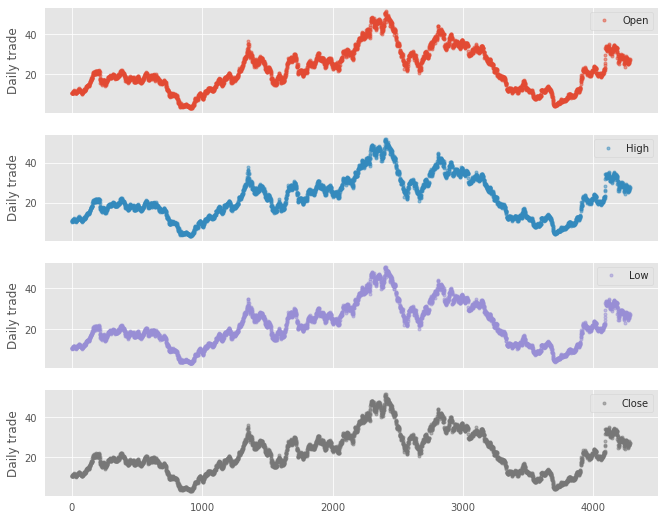

In [11]:
cols_plot = ['Open', 'High', 'Low','Close']
axes = data[cols_plot].plot(marker='.', alpha=0.5, linestyle='None', figsize=(11, 9), subplots=True)
for ax in axes:
    ax.set_ylabel('Daily trade')

Then we'd print the data after making changes and dropping null data

            Date       Open       High        Low      Close  Adj Close  \
0     2005-07-13  10.620000  10.640000  10.510000  10.600000   9.197446   
1     2005-07-14  10.500000  10.500000  10.330000  10.390000   9.015231   
2     2005-07-15  10.500000  10.650000  10.500000  10.550000   9.154059   
3     2005-07-18  10.720000  10.740000  10.660000  10.720000   9.301566   
4     2005-07-19  10.800000  11.030000  10.800000  10.990000   9.535840   
...          ...        ...        ...        ...        ...        ...   
4274  2022-07-06  26.180000  26.570000  26.129999  26.420000  26.420000   
4275  2022-07-07  27.200001  27.879999  27.200001  27.700001  27.700001   
4276  2022-07-08  27.750000  28.090000  27.690001  27.900000  27.900000   
4277  2022-07-11  27.450001  27.540001  27.219999  27.260000  27.260000   
4278  2022-07-12  26.940001  27.420000  26.860001  27.129999  27.129999   

      Volume  MA for 10 days  MA for 50 days  MA for 100 days  Daily Return  
0     136500        2

,count,mean,std,min,25%,50%,75%,max
Open,4279.0,2.237445e+01,10.299331,3.170000,14.695000,2.099000e+01,2.935500e+01,5.126000e+01
High,4279.0,2.261316e+01,10.374618,3.410000,14.900000,2.123000e+01,2.972000e+01,5.180000e+01
Low,4279.0,2.210889e+01,10.228782,3.050000,14.505000,2.079000e+01,2.910000e+01,5.065000e+01
Close,4279.0,2.236894e+01,10.297576,3.140000,14.725000,2.103000e+01,2.940500e+01,5.147000e+01
Adj Close,4279.0,2.180599e+01,10.523917,2.907577,13.620653,2.040992e+01,2.913283e+01,5.144851e+01
Volume,4279.0,1.477393e+06,939806.962446,0.000000,859950.000000,1.268200e+06,1.866100e+06,1.085910e+07
MA for 10 days,4279.0,2.237635e+01,10.261658,3.431000,14.939500,2.109000e+01,2.939800e+01,5.049200e+01
MA for 50 days,4279.0,2.240954e+01,10.102053,3.923000,15.077400,2.106560e+01,2.923080e+01,4.794400e+01
MA for 100 days,4279.0,2.244370e+01,9.891112,4.185200,15.286750,2.151730e+01,2.835625e+01,4.625290e+01
Daily Return,4279.0,6.706601e-04,0.030190,-0.179845,-0.014925,0.000000e+00,1.499271e-02,3.764706e-01


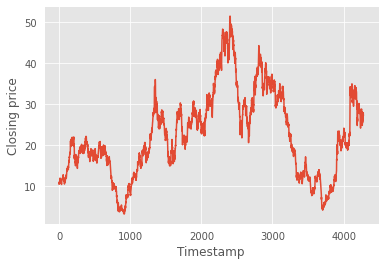

In [12]:
plt.plot(data['Close'], label="Close price")
plt.xlabel("Timestamp")
plt.ylabel("Closing price")
df = data
print(df)

df.describe().transpose()

The data has been analysed but it must be converted into data of shape [100,1] to make it easier for CNN to train on... Else it won't select necessary features and the model will fail

In [68]:
from sklearn.model_selection import train_test_split

X = []
Y = []
window_size=100
for i in range(1 , len(df) - window_size -1 , 1):
    first = df.iloc[i,2]
    temp = []
    temp2 = []
    for j in range(window_size):
        temp.append((df.iloc[i + j, 2] - first) / first)
    temp2.append((df.iloc[i + window_size, 2] - first) / first)
    X.append(np.array(temp).reshape(100, 1))
    Y.append(np.array(temp2).reshape(1, 1))

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, shuffle=True)

train_X = np.array(x_train)
test_X = np.array(x_test)
train_Y = np.array(y_train)
test_Y = np.array(y_test)

train_X = train_X.reshape(train_X.shape[0],1,100,1)
test_X = test_X.reshape(test_X.shape[0],1,100,1)

In [42]:
print(train_X.shape, test_X.shape)

(3341, 1, 100, 1) (836, 1, 100, 1)


# Training part

This part has 2 subparts: CNN and LSTM

For CNN, the layers are created with sizes 64,128,64 with kernel size = 3. In every layer, TimeDistributed function is added to track the features for every temporal slice of data with respect to time. In between, MaxPooling layers are added.

After that, it's passed to Bi-LSTM layers

In [43]:
# For creating model and training
import tensorflow as tf
from tensorflow.keras.layers import Conv1D, LSTM, Dense, Dropout, Bidirectional, TimeDistributed
from tensorflow.keras.layers import MaxPooling1D, Flatten
from tensorflow.keras.regularizers import L1, L2
from tensorflow.keras.metrics import Accuracy
from tensorflow.keras.metrics import RootMeanSquaredError

model = tf.keras.Sequential()

# Creating the Neural Network model here...
# CNN layers
model.add(TimeDistributed(Conv1D(32, kernel_size=1, activation='tanh', input_shape=(None, 100, 1))))
model.add(TimeDistributed(MaxPooling1D(2)))
model.add(TimeDistributed(Conv1D(128, kernel_size=3, activation='relu')))
model.add(TimeDistributed(MaxPooling1D(2)))
model.add(TimeDistributed(Conv1D(64, kernel_size=3, activation='relu')))
model.add(TimeDistributed(MaxPooling1D(2)))
model.add(TimeDistributed(Flatten()))
# model.add(Dense(5, kernel_regularizer=L2(0.01)))

# LSTM layers
model.add(Bidirectional(LSTM(64, return_sequences=True)))
model.add(Dropout(0.5))
model.add(Bidirectional(LSTM(64, return_sequences=False)))
model.add(Dropout(0.5))

#Final layers
model.add(Dense(1, activation='tanh'))
model.compile(optimizer='adam', loss='mse', metrics=['mse', 'mae'])

history = model.fit(train_X, train_Y, validation_data=(test_X,test_Y), epochs=100,batch_size=64, verbose=1, shuffle =True)

Epoch 1/100
53/53 [==============================] - 13s 70ms/step - loss: 0.0479 - mse: 0.0479 - mae: 0.1441 - val_loss: 0.0165 - val_mse: 0.0165 - val_mae: 0.0876
Epoch 2/100
53/53 [==============================] - 2s 38ms/step - loss: 0.0149 - mse: 0.0149 - mae: 0.0784 - val_loss: 0.0095 - val_mse: 0.0095 - val_mae: 0.0592
Epoch 3/100
53/53 [==============================] - 2s 37ms/step - loss: 0.0121 - mse: 0.0121 - mae: 0.0671 - val_loss: 0.0090 - val_mse: 0.0090 - val_mae: 0.0585
Epoch 4/100
53/53 [==============================] - 2s 37ms/step - loss: 0.0111 - mse: 0.0111 - mae: 0.0625 - val_loss: 0.0078 - val_mse: 0.0078 - val_mae: 0.0508
Epoch 5/100
53/53 [==============================] - 2s 37ms/step - loss: 0.0105 - mse: 0.0105 - mae: 0.0601 - val_loss: 0.0083 - val_mse: 0.0083 - val_mae: 0.0524
Epoch 6/100
53/53 [==============================] - 2s 37ms/step - loss: 0.0101 - mse: 0.0101 - mae: 0.0578 - val_loss: 0.0071 - val_mse: 0.0071 - val_mae: 0.0467
Epoch 7/100
53/

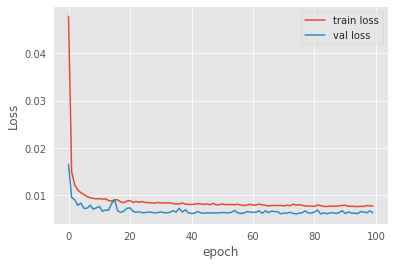

In [44]:
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.xlabel("epoch")
plt.ylabel("Loss")
plt.legend()

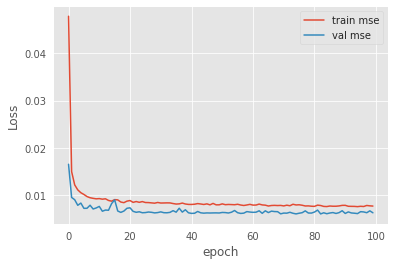

In [45]:
plt.plot(history.history['mse'], label='train mse')
plt.plot(history.history['val_mse'], label='val mse')
plt.xlabel("epoch")
plt.ylabel("Loss")
plt.legend()

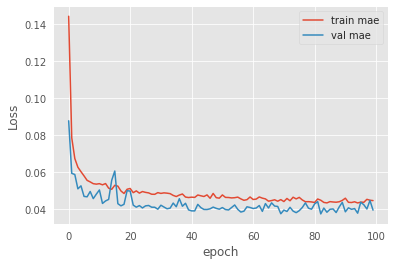

In [46]:
plt.plot(history.history['mae'], label='train mae')
plt.plot(history.history['val_mae'], label='val mae')
plt.xlabel("epoch")
plt.ylabel("Loss")
plt.legend()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 time_distributed_15 (TimeDi  (None, 1, 100, 32)       64        
 stributed)                                                      
                                                                 
 time_distributed_16 (TimeDi  (None, 1, 50, 32)        0         
 stributed)                                                      
                                                                 
 time_distributed_17 (TimeDi  (None, 1, 48, 128)       12416     
 stributed)                                                      
                                                                 
 time_distributed_18 (TimeDi  (None, 1, 24, 128)       0         
 stributed)                                                      
                                                                 
 time_distributed_19 (TimeDi  (None, 1, 22, 64)       

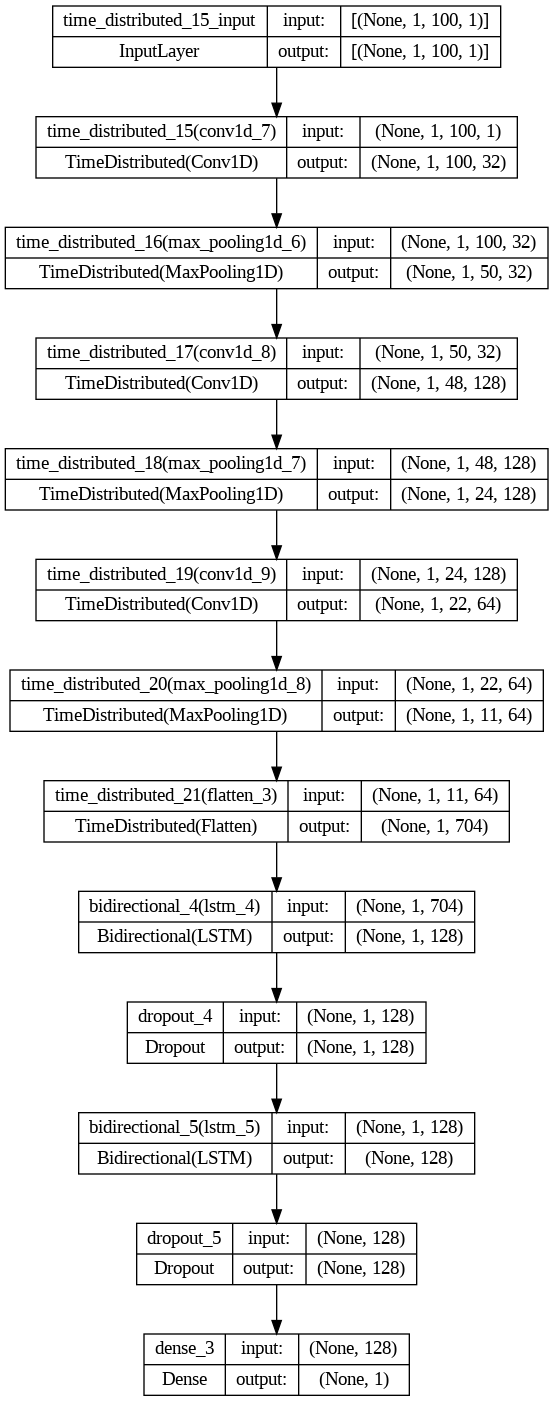

In [47]:
# After the model has been constructed, we'll summarise it
from tensorflow.keras.utils import plot_model
print(model.summary())
plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)

In [48]:
model.evaluate(test_X, test_Y)

27/27 [==============================] - 0s 7ms/step - loss: 0.0062 - mse: 0.0062 - mae: 0.0393


[0.006198078393936157, 0.006198078393936157, 0.039255134761333466]

In [49]:
from sklearn.metrics import explained_variance_score, mean_poisson_deviance, mean_gamma_deviance
from sklearn.metrics import r2_score
from sklearn.metrics import max_error

# predict probabilities for test set
yhat_probs = model.predict(test_X, verbose=0)
# reduce to 1d array
yhat_probs = yhat_probs[:, 0]

var = explained_variance_score(test_Y.reshape(-1,1), yhat_probs)
print('Variance: %f' % var)

r2 = r2_score(test_Y.reshape(-1,1), yhat_probs)
print('R2 Score: %f' % var)

var2 = max_error(test_Y.reshape(-1,1), yhat_probs)
print('Max Error: %f' % var2)

Variance: 0.962150
R2 Score: 0.962150
Max Error: 0.722868


27/27 [==============================] - 0s 7ms/step


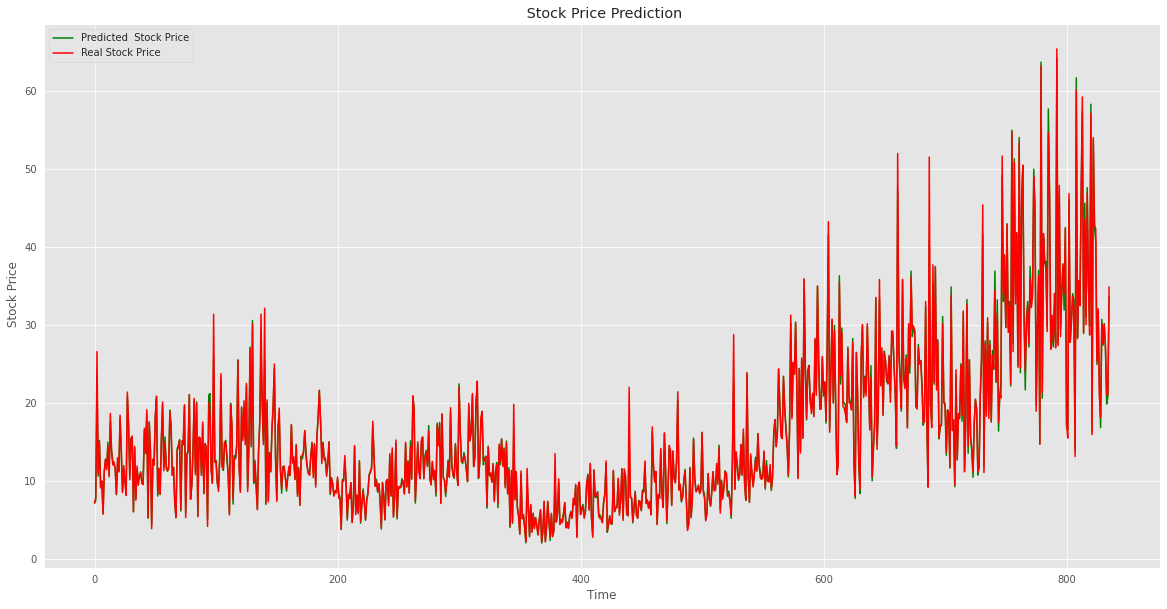

In [69]:
predicted  = model.predict(test_X)
test_label = test_Y.reshape(-1,1)
predicted = np.array(predicted[:,0]).reshape(-1,1)
len_t = len(train_X)
for j in range(len_t , len_t + len(test_X)):
    temp = data.iloc[j,3]
    test_label[j - len_t] = test_label[j - len_t] * temp + temp
    predicted[j - len_t] = predicted[j - len_t] * temp + temp
plt.figure(figsize=(20,10))
plt.plot(predicted, color = 'green', label = 'Predicted  Stock Price')
plt.plot(test_label, color = 'red', label = 'Real Stock Price')
plt.title(' Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel(' Stock Price')
plt.legend()
plt.show()

# Testing part

In this part, the model is saved and loaded back again. Then, it's made to train again but with different data to check it's loss and prediction

In [51]:
# First we need to save a model
model.save("model.h5")

In [52]:
# Load model
new_model = tf.keras.models.load_model("./model.h5")

In [53]:
new_model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 time_distributed_15 (TimeDi  (None, 1, 100, 32)       64        
 stributed)                                                      
                                                                 
 time_distributed_16 (TimeDi  (None, 1, 50, 32)        0         
 stributed)                                                      
                                                                 
 time_distributed_17 (TimeDi  (None, 1, 48, 128)       12416     
 stributed)                                                      
                                                                 
 time_distributed_18 (TimeDi  (None, 1, 24, 128)       0         
 stributed)                                                      
                                                                 
 time_distributed_19 (TimeDi  (None, 1, 22, 64)       

In [62]:
df2

,Open,High,Low,Close,Adj Close,Volume
0,10.620000,10.640000,10.510000,10.600000,9.197446,136500
1,10.500000,10.500000,10.330000,10.390000,9.015231,136000
2,10.500000,10.650000,10.500000,10.550000,9.154059,158700
3,10.720000,10.740000,10.660000,10.720000,9.301566,88000
4,10.800000,11.030000,10.800000,10.990000,9.535840,128000
...,...,...,...,...,...,...
4274,26.180000,26.570000,26.129999,26.420000,26.420000,623700
4275,27.200001,27.879999,27.200001,27.700001,27.700001,715700
4276,27.750000,28.090000,27.690001,27.900000,27.900000,355300
4277,27.450001,27.540001,27.219999,27.260000,27.260000,341700


In [70]:
# For data preprocessing and analysis part
data2 = pd.read_csv('/content/TTM.csv')
# Any CSV or TXT file can be added here....
data2.dropna(inplace=True)
data2.head()

data2.reset_index(drop=True, inplace=True)
data2.fillna(data.mean(), inplace=True)
data2.head()
df2 = data2.drop('Date', axis=1)

print(df2)

X = []
Y = []
window_size=100
for i in range(1 , len(df2) - window_size -1 , 1):
    first = df2.iloc[i,4]
    temp = []
    temp2 = []
    for j in range(window_size):
        temp.append((df2.iloc[i + j, 4] - first) / first)
    # for j in range(week):
    temp2.append((df2.iloc[i + window_size, 4] - first) / first)
    # X.append(np.array(stock.iloc[i:i+window_size,4]).reshape(50,1))
    # Y.append(np.array(stock.iloc[i+window_size,4]).reshape(1,1))
    # print(stock2.iloc[i:i+window_size,4])
    X.append(np.array(temp).reshape(100, 1))
    Y.append(np.array(temp2).reshape(1, 1))

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, shuffle=False)

train_X = np.array(x_train)
test_X = np.array(x_test)
train_Y = np.array(y_train)
test_Y = np.array(y_test)

train_X = train_X.reshape(train_X.shape[0],1,100,1)
test_X = test_X.reshape(test_X.shape[0],1,100,1)

print(len(train_X))
print(len(test_X))

<ipython-input-70-16a170cee50e>:8: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  data2.fillna(data.mean(), inplace=True)


           Open       High        Low      Close  Adj Close  Volume
0     10.620000  10.640000  10.510000  10.600000   9.197446  136500
1     10.500000  10.500000  10.330000  10.390000   9.015231  136000
2     10.500000  10.650000  10.500000  10.550000   9.154059  158700
3     10.720000  10.740000  10.660000  10.720000   9.301566   88000
4     10.800000  11.030000  10.800000  10.990000   9.535840  128000
...         ...        ...        ...        ...        ...     ...
4274  26.180000  26.570000  26.129999  26.420000  26.420000  623700
4275  27.200001  27.879999  27.200001  27.700001  27.700001  715700
4276  27.750000  28.090000  27.690001  27.900000  27.900000  355300
4277  27.450001  27.540001  27.219999  27.260000  27.260000  341700
4278  26.940001  27.420000  26.860001  27.129999  27.129999  506800

[4279 rows x 6 columns]
3341
836


In [71]:
model.evaluate(test_X, test_Y)

27/27 [==============================] - 0s 7ms/step - loss: 0.0090 - mse: 0.0090 - mae: 0.0490


[0.009039276279509068, 0.009039276279509068, 0.04895121604204178]

27/27 [==============================] - 0s 7ms/step


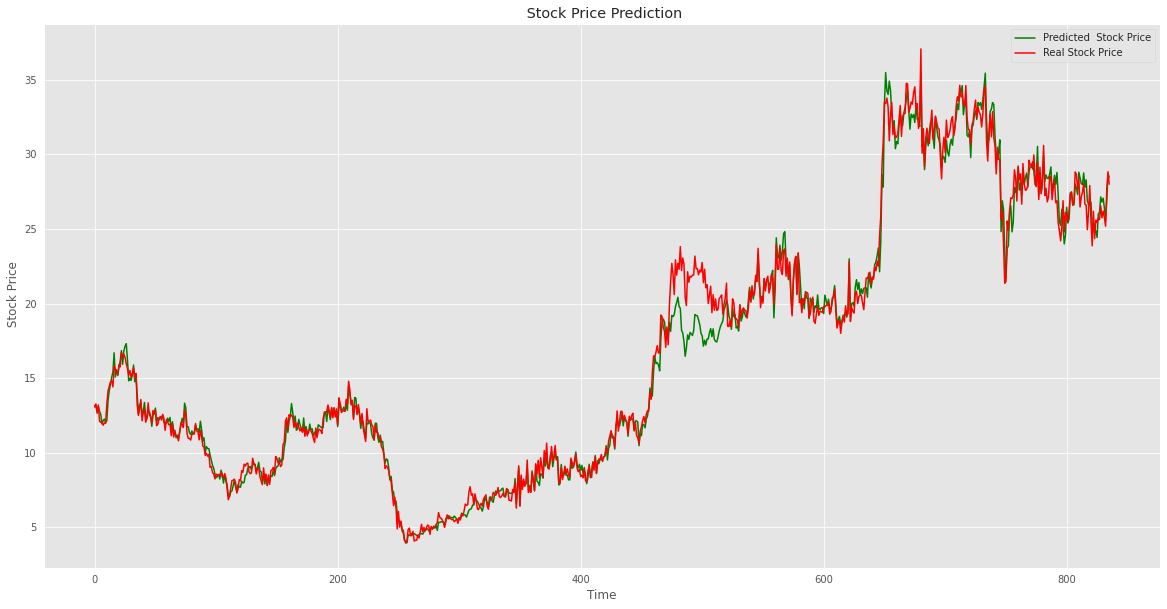

In [72]:
predicted  = model.predict(test_X)
test_label = test_Y.reshape(-1,1)
predicted = np.array(predicted[:,0]).reshape(-1,1)
len_t = len(train_X)
for j in range(len_t , len_t + len(test_X)):
    temp = data2.iloc[j,3]
    test_label[j - len_t] = test_label[j - len_t] * temp + temp
    predicted[j - len_t] = predicted[j - len_t] * temp + temp
plt.figure(figsize=(20,10))
plt.plot(predicted, color = 'green', label = 'Predicted  Stock Price')
plt.plot(test_label, color = 'red', label = 'Real Stock Price')
plt.title(' Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel(' Stock Price')
plt.legend()
plt.show()